In [2]:
# 5 November 2019
# load moons dataset

from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

moons = make_moons( )
moons

(array([[ 1.40478334e+00, -4.14412623e-01],
        [ 1.62348980e+00, -2.81831482e-01],
        [ 8.40400105e-01, -4.87181783e-01],
        [ 9.97945393e-01,  6.40702200e-02],
        [ 5.72116660e-01,  8.20172255e-01],
        [ 7.30832427e-02,  1.24732995e-01],
        [ 7.18349350e-01,  6.95682551e-01],
        [ 3.27051370e-02,  2.46345416e-01],
        [ 9.49055747e-01,  3.15108218e-01],
        [ 1.00000000e+00,  0.00000000e+00],
        [-8.71318704e-01,  4.90717552e-01],
        [ 1.99794539e+00,  4.35929780e-01],
        [ 1.71834935e+00, -1.95682551e-01],
        [-6.72300890e-01,  7.40277997e-01],
        [ 4.81607432e-01, -3.55142763e-01],
        [ 1.84408430e-02,  3.08841371e-01],
        [ 2.84527587e-01,  9.58667853e-01],
        [ 1.90096887e+00,  6.61162609e-02],
        [ 8.71318704e-01,  4.90717552e-01],
        [-9.97945393e-01,  6.40702200e-02],
        [ 1.67230089e+00, -2.40277997e-01],
        [ 1.98155916e+00,  3.08841371e-01],
        [-7.18349350e-01,  6.956

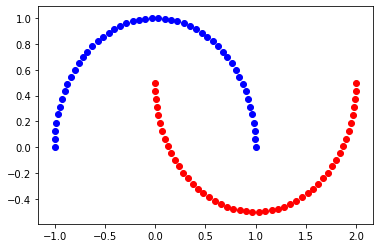

In [11]:
# extract the 'x' and 'y' values and plot the two moons

import matplotlib.pyplot as plt

length = len( moons[ 0 ] )
# print( length )

a, b, c, d = [ ], [ ], [ ], [ ]

for i in range( length ):
    if moons[ 1 ][ i ]  == 0:
        a.append( moons[ 0 ][ i, ( 0 ) ] )
        b.append( moons[ 0 ][ i, ( 1 ) ] )
    else:
        c.append( moons[ 0 ][ i, ( 0 ) ] )
        d.append( moons[ 0 ][ i, ( 1 ) ] )

plt.scatter( a, b, color = "blue" )
plt.scatter( c, d, color = "red" )
plt.show( )

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression( )
rnd_clf = RandomForestClassifier( )
svm_clf = SVC( )

In [5]:
voting_clf = VotingClassifier( 
        estimators = [ ('lr', log_clf), ( 'rf', rnd_clf ), ('svc', svm_clf ) ],
        voting = 'hard' )

x = moons[ 0 ][ :, ( 0, 1 ) ]
y = moons[ 1 ][ : ]

voting_clf.fit( x, y )
voting_clf.predict( [ [ 0.4, 1.0 ] ] )

C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0], dtype=int64)

In [6]:
# to test the accuracy of each classifier for a single x, y value

from sklearn.metrics import accuracy_score

for clf in ( log_clf, rnd_clf, svm_clf, voting_clf ):
    clf.fit( x, y )
    y_pred = clf.predict( [ [ 0.4, 1.0 ] ] )
    print( clf.__class__.__name__, accuracy_score( [0], y_pred ) )


LogisticRegression 1.0
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.2

In [7]:
# to test the accuracy of each classifier for a test set

from sklearn.model_selection import train_test_split

x = moons[ 0 ][ : ]
y = moons[ 1 ][ : ]

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 42 )

for clf in ( log_clf, rnd_clf, svm_clf, voting_clf ):
    clf.fit( x, y )
    y_pred = clf.predict( x_test )
    print( clf.__class__.__name__, accuracy_score( y_test, y_pred ) )


LogisticRegression 1.0
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cl-simons\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to accou

In [10]:
RandomForestClassifier?